# Modelado
Utilizaremos diferentes algoritmos de regresion que resultan utiles para datos con variables numericas y optaremos por quedarnos con el mejor.

### Algoritmos: 
    - Suport Vector Regression (SVR)

    - Random Forest Regression

    - Desicion Tree Regression
    
### Metricas:

    - mean_square_error
    - r^2score

## Load Library

In [ ]:
import pandas as pd
import numpy as np
#feature engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer
# models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')




## Load Dataset

In [3]:
data=pd.read_csv('../data/processed/data_clear.csv')
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


## Train and Test set

In [4]:
np.random.seed(23)

X = data.drop(columns='Age')
y = data.Age

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=19,stratify=X['Sex'])
x_train.shape,x_test.shape

((3114, 8), (779, 8))

## One Hot encoding with Feature-Engine

In [5]:
encoder = OneHotEncoder(drop_last=True) # k_1
encoder.fit(x_train)

OneHotEncoder(drop_last=True)

In [6]:
encoder.encoder_dict_

{'Sex': ['I', 'F']}

In [7]:
# transform the data sets
x_train_encod = encoder.transform(x_train)
x_test_encod = encoder.transform(x_test)
x_test_encod.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_F
1400,1.6375,1.300,0.4500,42.297454,20.369116,10.205820,10.064072,0,0
953,1.0750,0.825,0.2375,9.071840,3.345241,1.842718,3.486988,1,0
989,1.2625,1.100,0.3500,23.459211,9.681354,5.258832,6.775531,0,0
3244,1.2500,0.950,0.3875,16.882127,6.052618,4.564269,5.669900,0,0
3597,1.2125,0.900,0.3000,14.614167,6.988152,2.905824,4.167376,1,0


## Feature Scalig with StandardScaler

In [ ]:
sc_x = StandardScaler()
x_train_sc = sc_x.fit_transform(x_train_encod)
x_test_sc = sc_x.transform(x_test_encod)

---
Optional 

In [25]:
# pipeline
pipe = Pipeline(
    [
    ('one hot',OneHotEncoder(drop_last=True)),
    ('scaler',StandardScaler())
    ])
pipe.fit(x_train)

Pipeline(steps=[('one hot', OneHotEncoder(drop_last=True)),
                ('scaler', StandardScaler())])

In [26]:
# transform the data sets
x_train_sc = pipe.transform(x_train)
x_test_sc = pipe.transform(x_test)

# Support Vector Regression

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_sc, y_train)

SVR()

In [ ]:
predit = regressor.predict(x_train_sc)

In [20]:
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.5513388032670781
Error Cuadratico Medio: 4.72032415523297


In [22]:
## validacion
predit=regressor.predict(x_test_sc)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5412251322781663
Error Cuadratico Medio: 4.484337768831794


- No Presentamos problemas de overfiting pero las metricas no resultan muy favorables.

In [23]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    "C": [0.1, 1, 10, 100],            # Regularización
    "kernel": ["linear", "rbf", "poly"], # Tipos de kernel
    "gamma": ["scale", "auto", 0.01, 0.1, 1],  # Solo para 'rbf' y 'poly'
    "epsilon": [0.1, 0.2, 0.5, 1.0]    # Margen de tolerancia
}
gs_svr = GridSearchCV(regressor,param_grid,scoring='r2',cv=5,n_jobs=-1)

In [46]:
gs_svr.fit(x_train,y_train.ravel()) # lo correremos en kaggle

/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machine_learnig_gomila/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConve

KeyboardInterrupt: 

# Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train.ravel())

RandomForestRegressor()

In [71]:
predit=regressor.predict(x_train)
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.9366722840880306
Error Cuadratico Medio: 0.06245524765242376


In [72]:
predit=regressor.predict(x_test)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5390668778876895
Error Cuadratico Medio: 0.4862857925691868


- presentamos problemas de overfing, es decir predice bastante bien con los datos de entrenamiento pero no con los de validacion.

# Redes Neuronales

In [34]:

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import L1
from tensorflow.keras.metrics import R2Score
from visualization.utils import history_curves

In [25]:
# aquitectura
modelo = Sequential()
modelo.add(Dense(32,input_dim=x_train.shape[1], activation='relu'))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [94]:
modelo.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
## entrenamiento
history = modelo.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=20)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7403 - r2_score: 0.2370 - val_loss: 0.5053 - val_r2_score: 0.4331
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.5287 - r2_score: 0.4632 - val_loss: 0.4722 - val_r2_score: 0.4703
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.5147 - r2_score: 0.4771 - val_loss: 0.4561 - val_r2_score: 0.4884
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.4575 - r2_score: 0.5446 - val_loss: 0.4437 - val_r2_score: 0.5022
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.4587 - r2_score: 0.5342 - val_loss: 0.4356 - val_r2_score: 0.5114
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.4563 - r2_score: 0.5588 - val_loss: 0.4405 - val_r2_score: 0.5058
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4625 - r2_score: 0.5505 - val_loss: 0.4296 - val_r2_score: 0.5180
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.4512 - r2_score: 0.5413 - val_

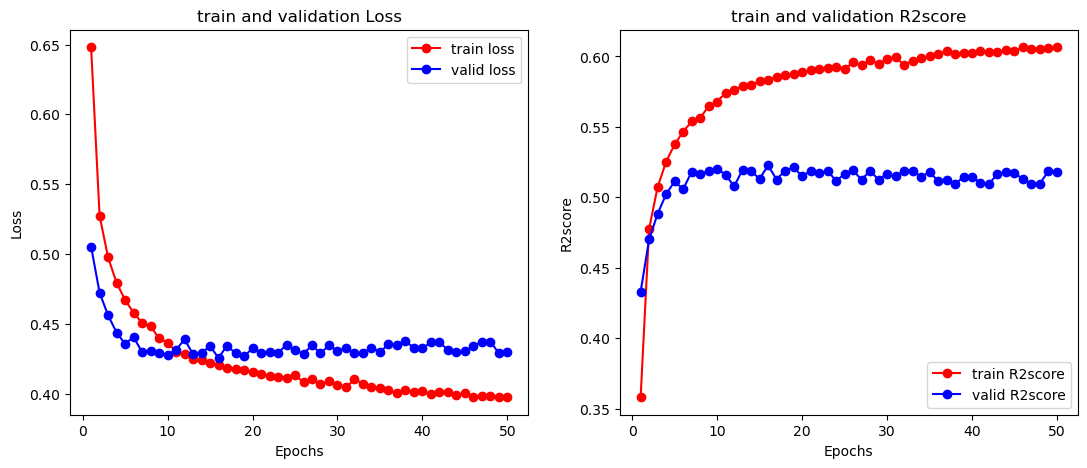

In [27]:
history_curves(history)

In [102]:
# Evaluacion del modelo
r2_score = modelo.evaluate(x_test, y_test)
print("Mean Squared Error:", r2_score)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4703 - r2_score: 0.5515 
Mean Squared Error: [0.4710101783275604, 0.5535460710525513]


In [16]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


In [28]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [ ]:
modelo = Sequential()
modelo.add(Dense(64,input_dim=x_train.shape[1], activation='relu'))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [32]:
history = modelo.fit(x_train,y_train,validation_split=0.2,batch_size=20,epochs=100,callbacks=callbacks)

Epoch 1/100


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.4265 - r2_score: 0.5745 - val_loss: 0.4485 - val_r2_score: 0.4969 - learning_rate: 0.0010
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.4101 - r2_score: 0.5982 - val_loss: 0.4401 - val_r2_score: 0.5063 - learning_rate: 0.0010
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4225 - r2_score: 0.5745 - val_loss: 0.4355 - val_r2_score: 0.5115 - learning_rate: 0.0010
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.4338 - r2_score: 0.5873 - val_loss: 0.4274 - val_r2_score: 0.5206 - learning_rate: 0.0010
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4289 - r2_score: 0.5772 - val_loss: 0.4374 - val_r2_score: 0.5093 - learning_rate: 0.0010
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.3827 - r2_score: 0.6139 - val_loss: 0.4461 - val_r2_score: 0.4996 - learning_rate: 0.0010
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.3930 - r2_score: 0.

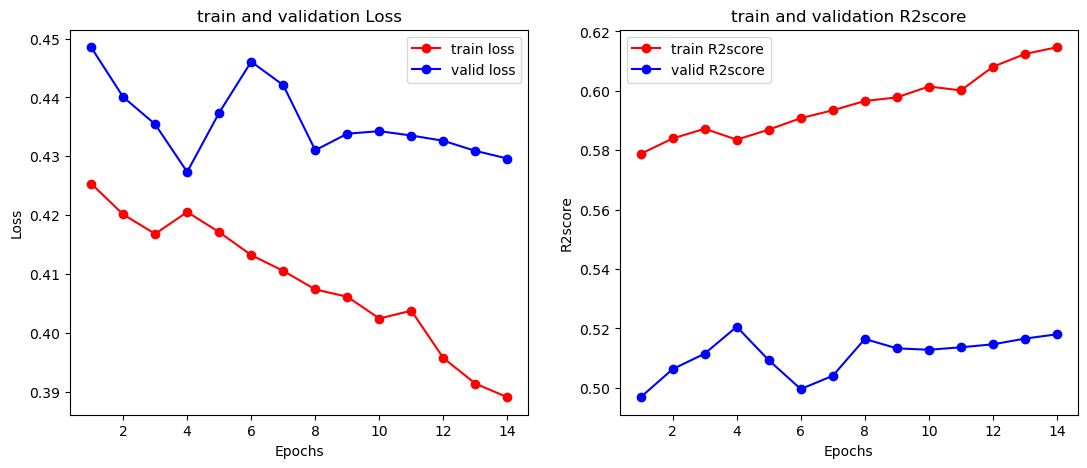

In [33]:
history_curves(history)

In [35]:
modelo = Sequential()
modelo.add(Dense(64,input_dim=x_train.shape[1], activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [36]:
history = modelo.fit(x_train,y_train,validation_split=0.2,batch_size=20,epochs=100,callbacks=callbacks)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6436 - r2_score: 0.3252 - val_loss: 0.4643 - val_r2_score: 0.4791 - learning_rate: 0.0010
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.5295 - r2_score: 0.4590 - val_loss: 0.4460 - val_r2_score: 0.4997 - learning_rate: 0.0010
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.5142 - r2_score: 0.4888 - val_loss: 0.4372 - val_r2_score: 0.5096 - learning_rate: 0.0010
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5123 - r2_score: 0.4932 - val_loss: 0.4263 - val_r2_score: 0.5218 - learning_rate: 0.0010
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.4775 - r2_score: 0.5166 - val_loss: 0.4290 - val_r2_score: 0.5187 - learning_rate: 0.0010
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.5007 - r2_score: 0.4916 - val_loss: 0.4229 - val_r2_score: 0.5256 - learning_rate: 0.0010
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4539 - r2

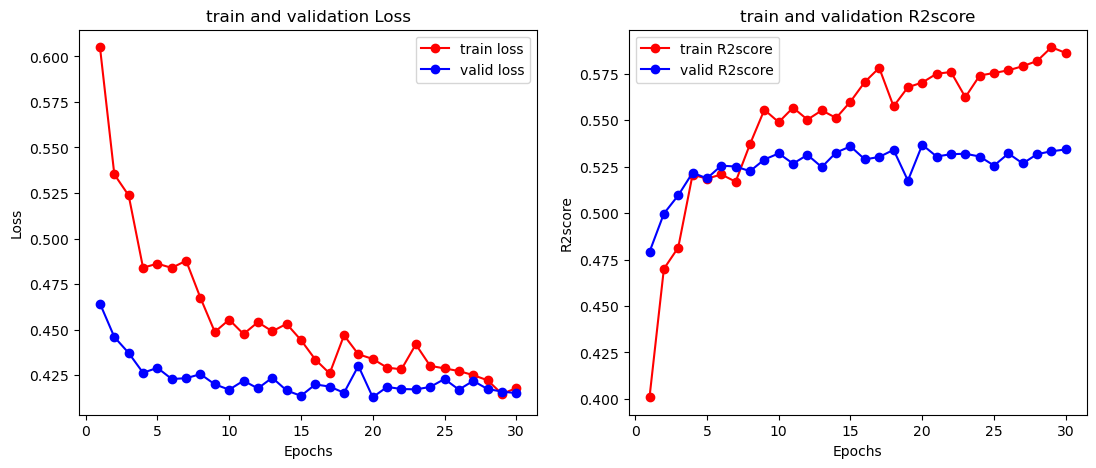

In [37]:
history_curves(history)